PCA

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def loadDataSet(filename):
    df = pd.read_csv(filename)
    return np.array(df)

def showData(dataMat, reconMat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:, 0], dataMat[:, 1], c='green')
    ax.scatter(np.array(reconMat[:, 0]), reconMat[:, 1], c='red')
    plt.show()
# only show first 2 dimension

In [15]:
def pca(dataMat, topNfeat=999999):

    # Put center of data at zero point
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals

    # Matrix XXT
    covmat = np.cov(meanRemoved, rowvar=0)

    # eignvalue topN
    eigVals, eigVects = np.linalg.eig(np.mat(covmat))
    eigValInd = np.argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]    # get N Eigenvalue
    redEigVects = eigVects[:, eigValInd]        # N Eigenvector
    print(redEigVects)

    # dimensionally reduction
    lowDDataMat = meanRemoved * redEigVects     # dimensionally reducted dataset
    reconMat = (lowDDataMat * redEigVects.T) + meanVals # Put dataset back
    return np.array(lowDDataMat), np.array(reconMat)





In [16]:
dataMat = loadDataSet('PCAtest.csv')
Feature = dataMat[0]


[[ 3.07031711e-03 -9.15214632e-03 -3.72689269e-02]
 [-3.91400804e-01 -3.76181887e-01 -2.73301842e-01]
 [-3.98380262e-01  4.33329918e-01 -2.87286400e-01]
 [-3.94890533e-01  2.85740156e-02 -2.80294121e-01]
 [-6.97945826e-03  8.09511804e-01 -1.39845583e-02]
 [ 2.44293182e-05  3.45665923e-04 -6.29943294e-04]
 [-4.27373053e-01 -8.43071561e-02  1.23199702e-02]
 [-4.32687916e-01 -3.22366952e-02  9.26179114e-03]
 [-4.02779945e-01  1.92988402e-02  8.03097050e-01]
 [-1.91330490e-03 -7.73518425e-02 -3.42666691e-01]]


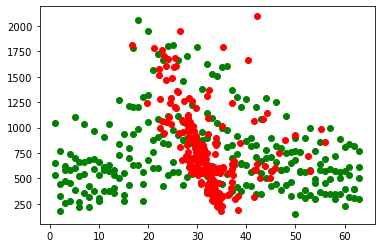

[[ 3.75936764e+01  1.30243196e+01  1.42710780e+02]
 [-9.67569961e+02  3.36281105e+00  1.71054949e+02]
 [ 3.75732504e+02  1.81651523e+01  1.18658123e+02]
 [ 1.36238391e+03  4.44682879e+01  2.91760787e+01]
 [ 9.92503635e+02  2.69414698e+01  4.29156490e+01]
 [ 7.59155145e+02 -3.86353691e+01  1.02958725e+01]
 [-1.84595473e+02  1.08040007e+02  2.24080269e+01]
 [ 4.48206660e+02 -1.51217574e+02  4.06854001e+01]
 [ 1.08180747e+03  7.49841453e+01  4.15271446e+01]
 [ 8.63234579e+02 -1.69516738e+02 -1.95744715e+01]
 [-4.79947438e+01  9.58210720e+01  6.46637602e+01]
 [ 1.16848151e+03 -9.50407140e+00  3.65602318e+01]
 [-1.83104450e+02  6.90711331e+01  7.61283430e+01]
 [ 5.96140763e+02  6.02547191e+01  6.84645155e+01]
 [ 2.85181811e+02  5.61486039e+01  7.09185057e+01]
 [ 8.40897483e+02 -8.05468859e+00  7.01940127e+01]
 [-1.00758185e+03 -3.43548201e+01  1.35489206e+02]
 [-1.64644011e+01 -1.47561548e+01  1.19001324e+02]
 [ 2.74799644e+02 -5.34397323e+00  9.49766513e+01]
 [ 1.08204865e+03  7.38399395e+

In [17]:
lowDDataMat, reconMat = pca(dataMat, 3)
#showData(dataMat, lowDDataMat)
showData(dataMat, reconMat)
print(lowDDataMat)

In [14]:
from sklearn.decomposition import PCA
 
skpca = PCA()
Train_pca = skpca.fit_transform(dataMat)
skpca.explained_variance_ratio_

array([9.49160713e-01, 2.73510910e-02, 1.67012074e-02, 5.16855785e-03,
       1.09686024e-03, 2.95698681e-04, 2.25857640e-04, 1.42125307e-08,
       5.40669036e-33, 8.24736956e-34])